Personalized Spotify Recommendation System
 
The challenge is to enhance the user experience by expanding the diversity and providing similar music recommendations.
 
I will be using Kaggle dataset genres_v2.csv from https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify?select=genres_v2.csv
The dataset comprises various musical features extracted from Spotify tracks, such as acousticness, danceability, energy, and more. These features quantify the characteristics of each song, offering a foundation for analytical insights and algorithmic interpretation.
 
I will tackle this challenge by using a K-means clustering approach. By grouping songs into distinct clusters based on their sonic attributes, I can create a recommendation system that not only identifies similar tracks within clusters but also recommends songs from adjacent or related clusters to introduce variety and broaden the user's musical exploration on Spotify.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'C:\Users\juliu\Downloads\genres_v2.csv', low_memory=False)

In [3]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [5]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [6]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


In [7]:
df.dropna(subset=features, inplace=True)

In [ ]:
# Standard features for the clustering

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

Now let's review some of the features to better understand the distribution and identify biases in data, such as a skew towards more danceable or less acoustic tracks.

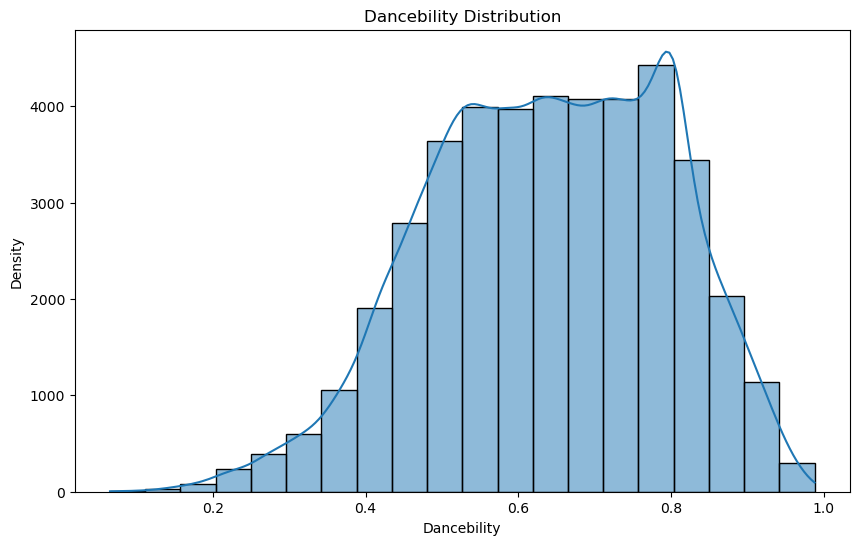

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['danceability'], bins=20, kde=True)
plt.title('Dancebility Distribution')
plt.xlabel('Dancebility')
plt.ylabel('Density')
plt.show()

Looking at the histogram and KDE plot for 'Danceability', the distribution is skewed towards higher values, indicating that a significant number of songs in the dataset are considered danceable. Specifically, there is a high frequency of songs with danceability scores close to 1.0, which suggests that this dataset might be biased towards songs that are good for dancing or that the source from which the data was collected favors more danceable tracks.

A conclusion you might draw from this is that when building a recommendation system with this data, there is a strong likelihood of recommending songs that are more danceable, since they contribute a major portion of the dataset

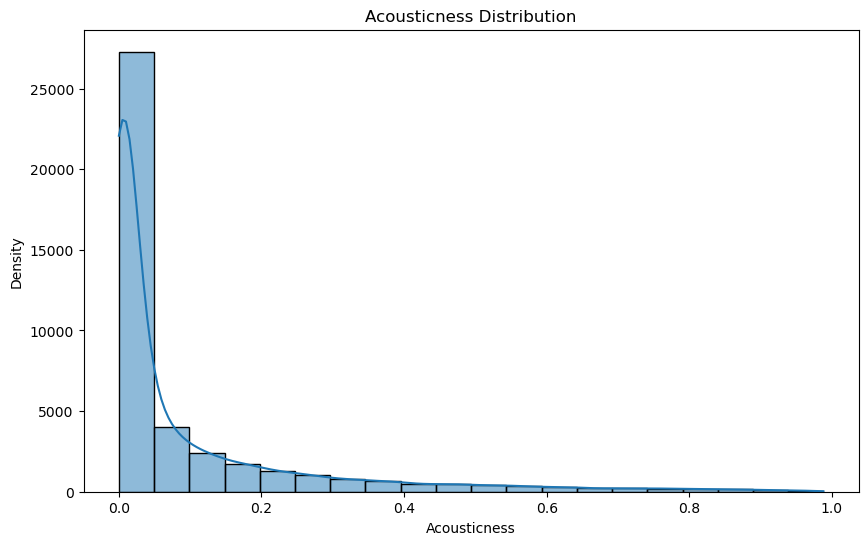

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['acousticness'], bins=20, kde=True)
plt.title('Acousticness Distribution')
plt.xlabel('Acousticness')
plt.ylabel('Density')
plt.show()

From the provided histogram of the 'Acousticness' distribution, it's evident that there's a significant concentration of songs with very low acoustics scores, showing a peak near 0. This suggests that a majority of the songs in this dataset are less acoustic, possibly more electronic, or produced with significant synthetic or non-acoustic elements. There are fewer songs with high acoustics values.

The conclusion here could be that the dataset may be biased towards non-acoustic, more electronically produced music, which could affect the types of recommendations given by a music recommendation system using this data. It may tend to recommend songs that are less acoustic in nature.

In [11]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)

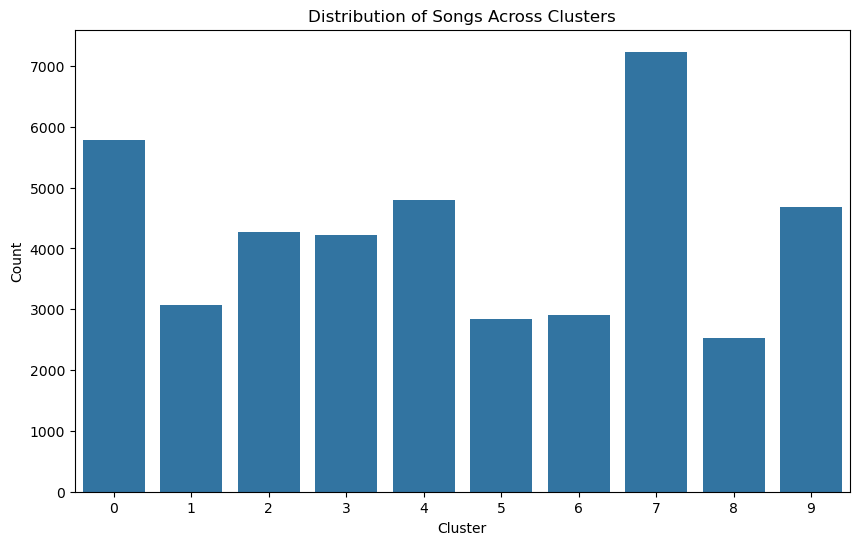

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df)
plt.title('Distribution of Songs Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [24]:
def recommend_songs(song_name, df, num_songs=5):
    if song_name not in df['song_name'].values:
        return "Song not found in the dataset."

    song_cluster = df.loc[df['song_name'] == song_name, 'cluster'].values[0]
    cluster_songs = df[df['cluster'] == song_cluster]
    recommended_songs = cluster_songs.sample(n=num_songs)['song_name'].tolist()
    
    return recommended_songs

Here we can enter the name of the song from the playlist and  receive recommendations according to the clustered data. Let's see what kind of songs are recommended if you are listening to the song named 'Venom'

In [25]:
print(recommend_songs('Venom', df))

['Gimmie Got Shot', 'BTW', 'Sleeping Bag', 'Underrated', 'Maserati (feat. YNW Melly)']
